In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D
from tensorflow.python.keras.optimizers import Adadelta, Nadam
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.utils import multi_gpu_model, plot_model
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.preprocessing import image
import tensorflow as tf
import random
from model import Unet
import time
import cv2

In [ ]:
unet = Unet(256, 64)
unet.load_weights('models/unet_dice40_64.h5')

In [101]:
idx = set([385,271,302,1,23,58,476,285,274,181,440,39,142,64,324,49,8,426,226,200,134,58,141,58,198,419,27,276,107,210,39,181,475,36,426,77,4,288,429,453,226,115,49,202,39,163,40,57,391,159,441,314,192,381,485,234,68,440,273,346,276,475,69,469,105,98,80,333,126,425,395,324,449,458,308,169,58,302,230,492,499,448,130,340,217,27,261,283,107,343,13,171,303,8,149,367,399,408,199,50,215,496,157])
idx = list(idx)
print(len(idx))
image_list = os.listdir('test')
image_list.sort()

86


KeyboardInterrupt: 

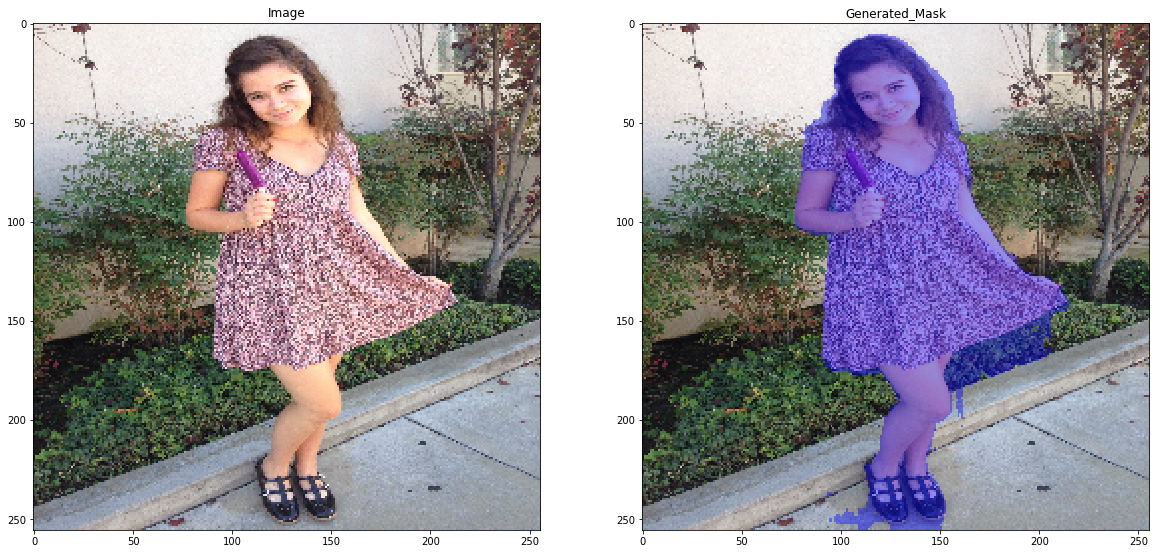

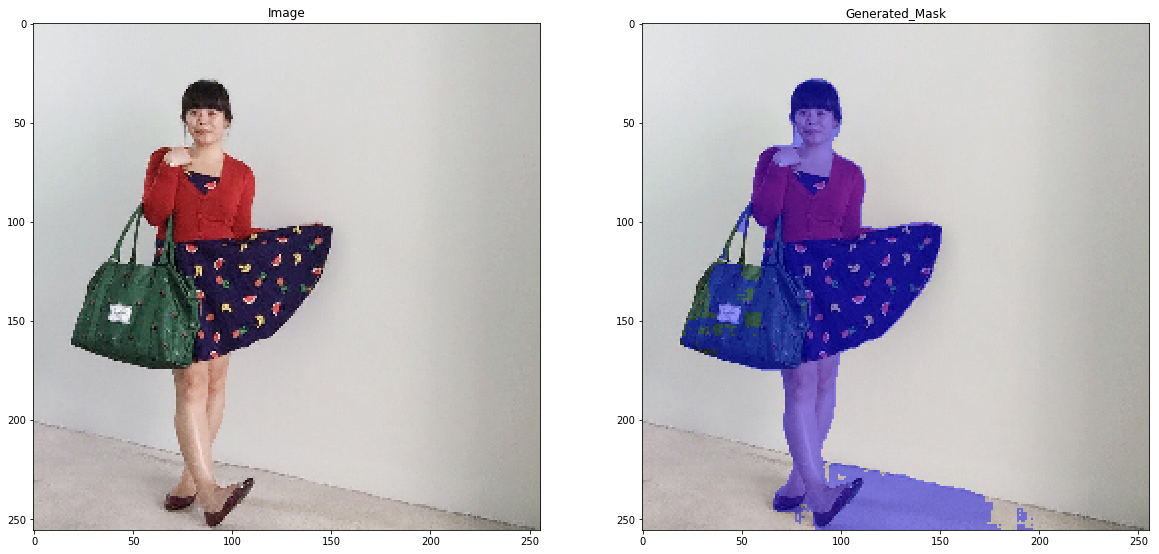

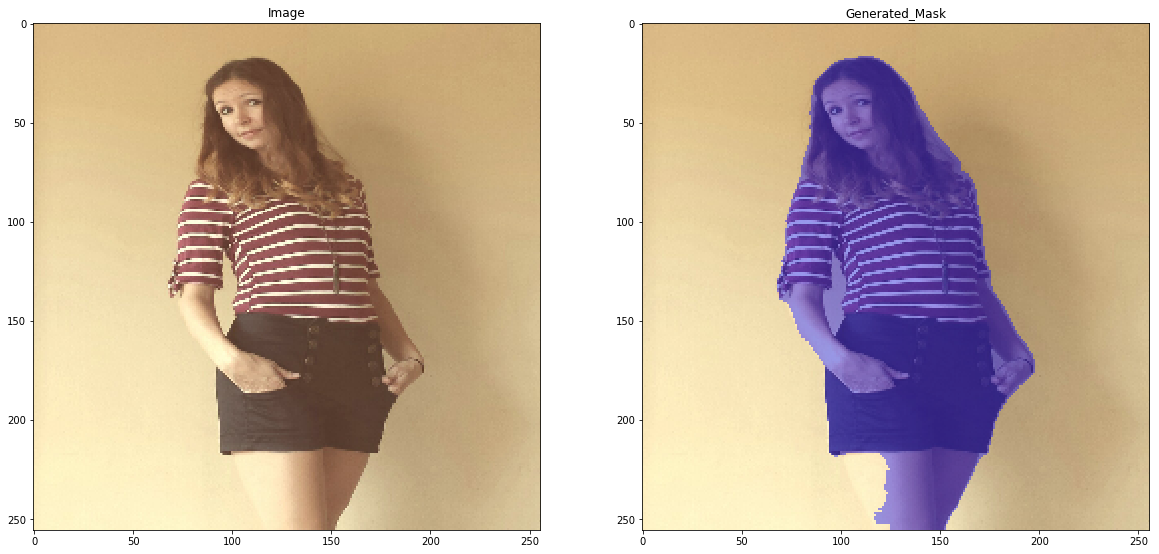

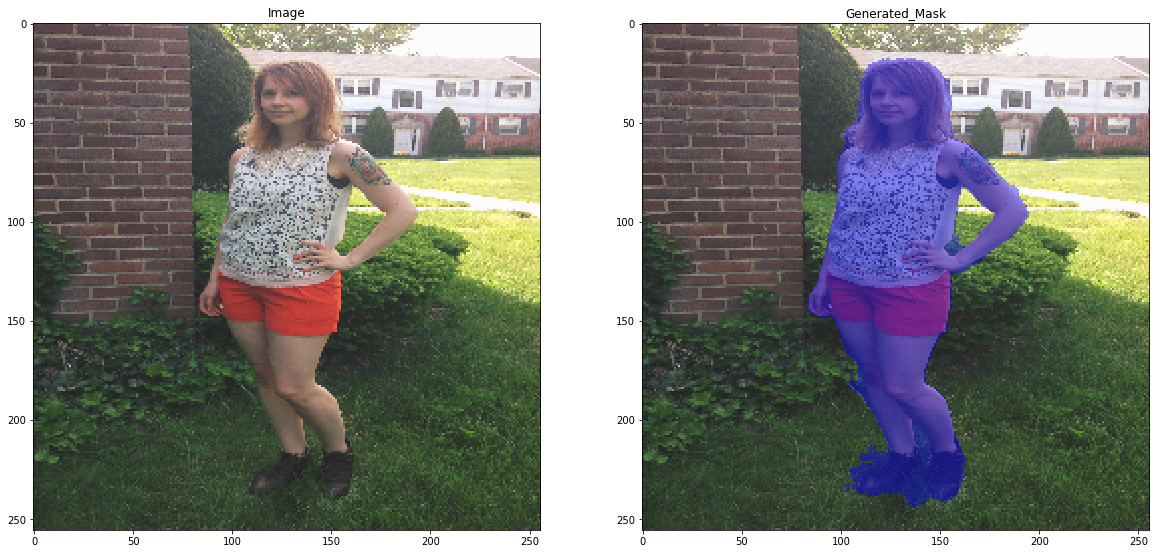

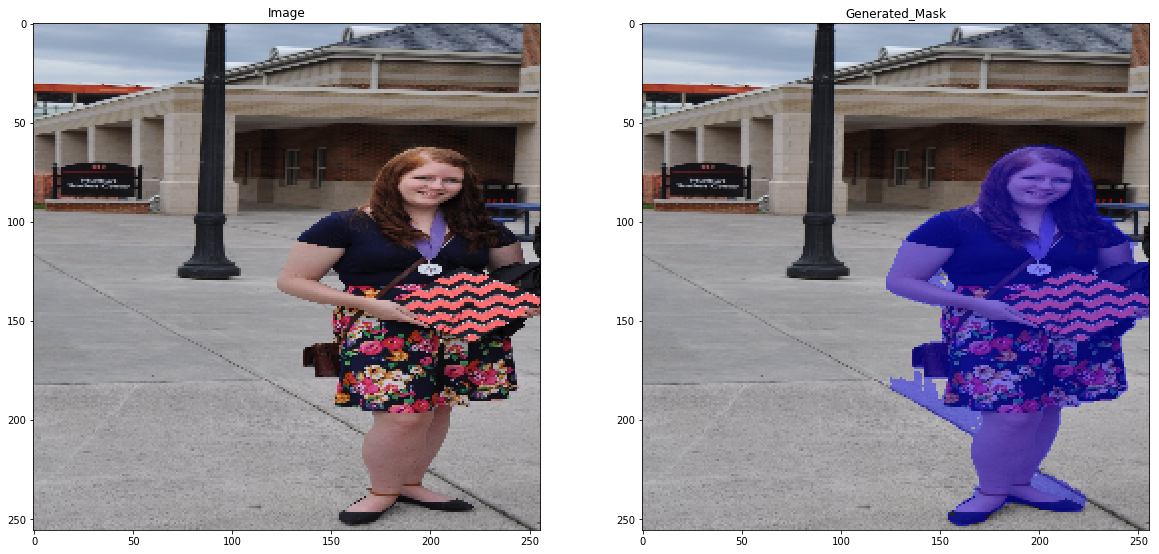

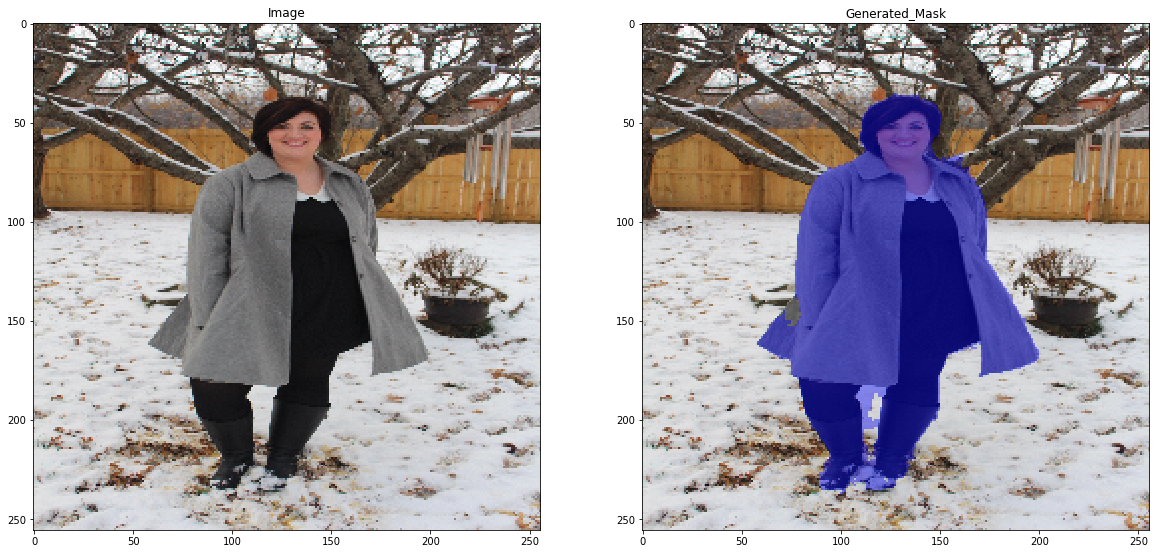

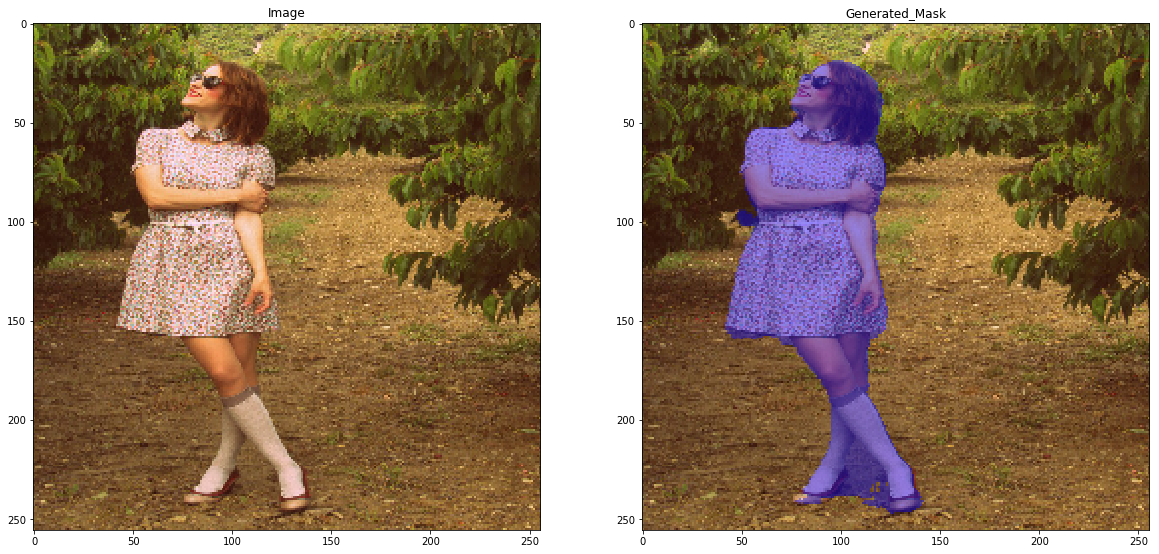

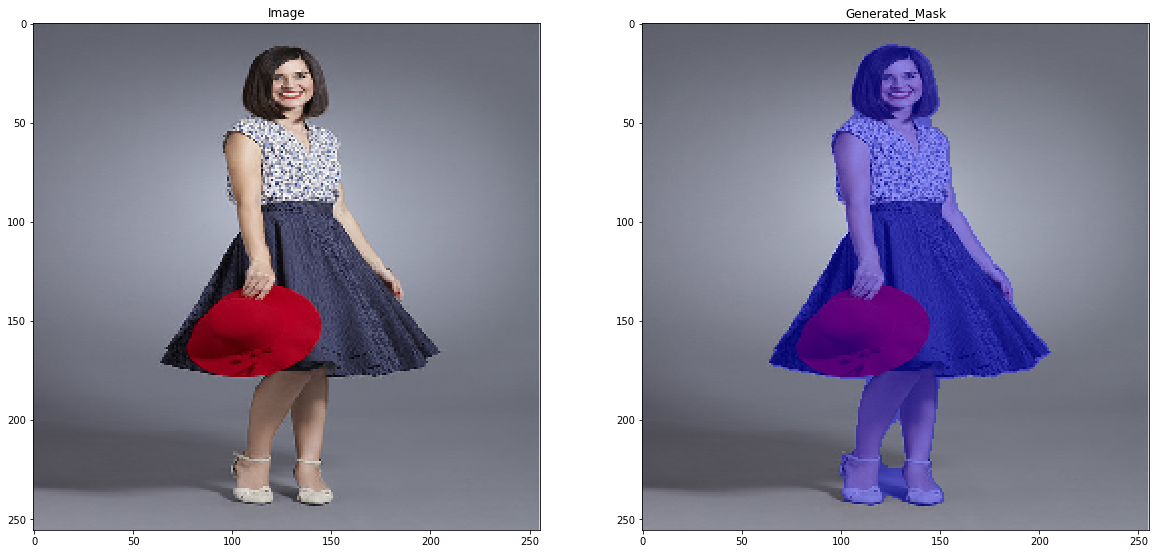

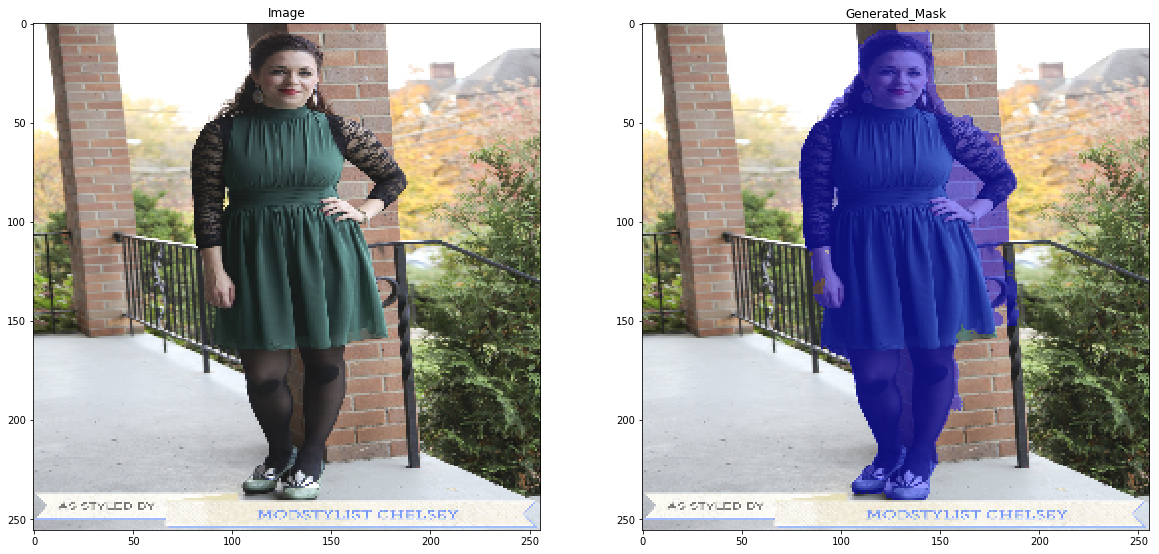

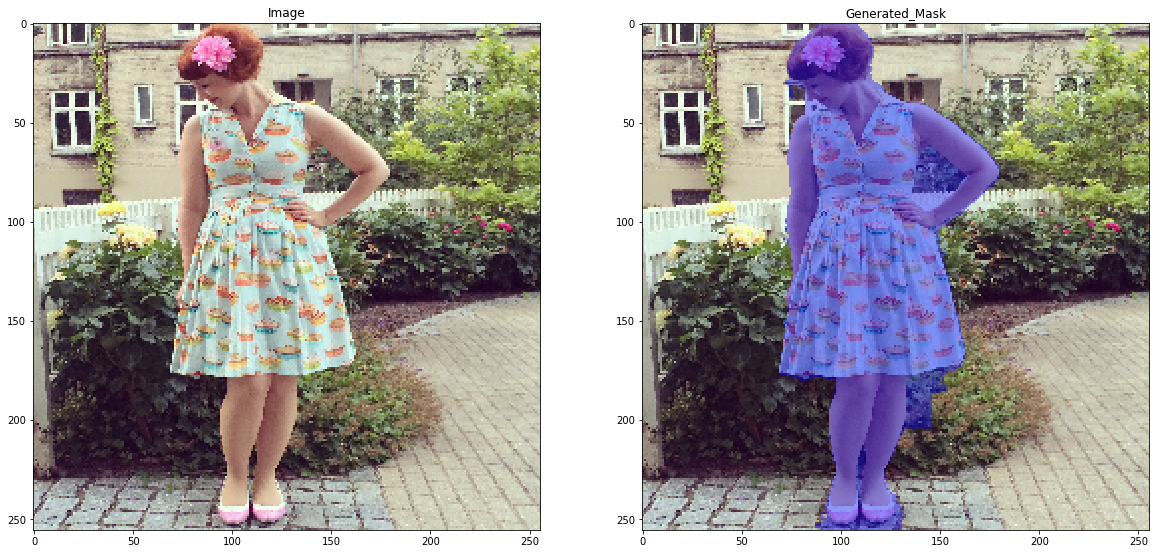

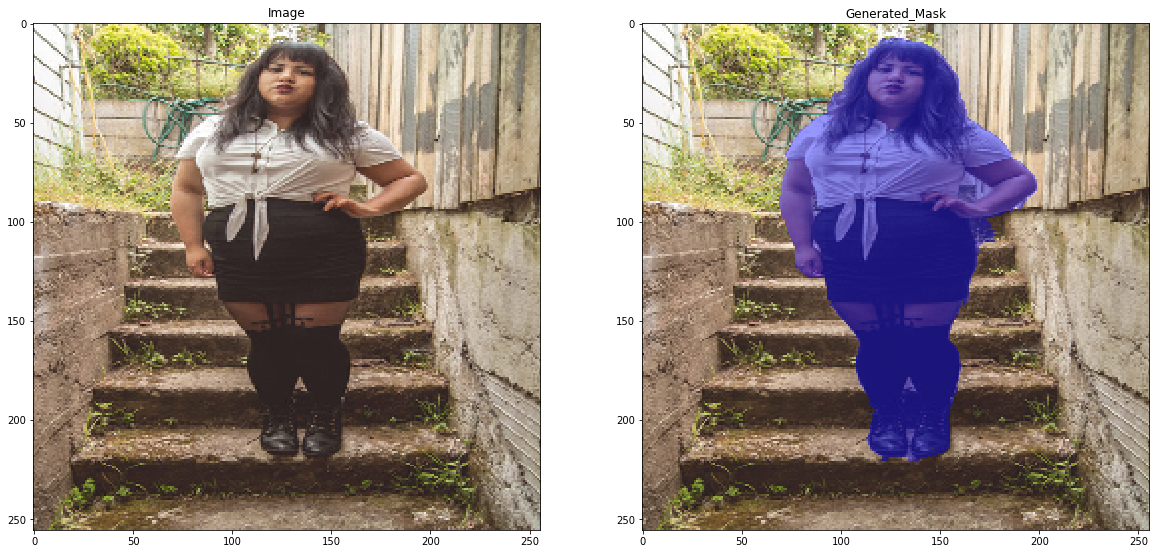

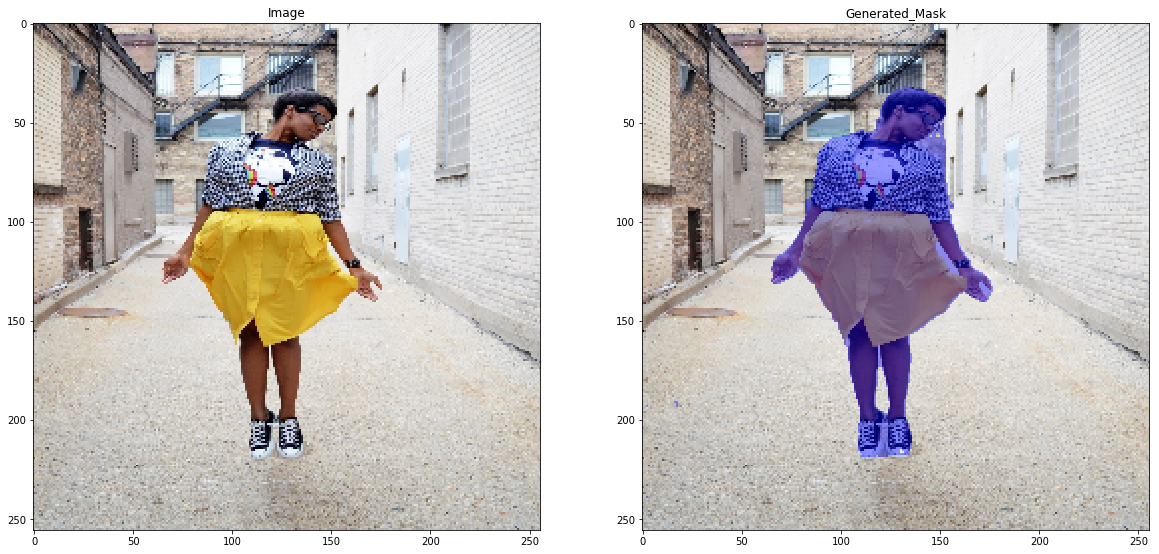

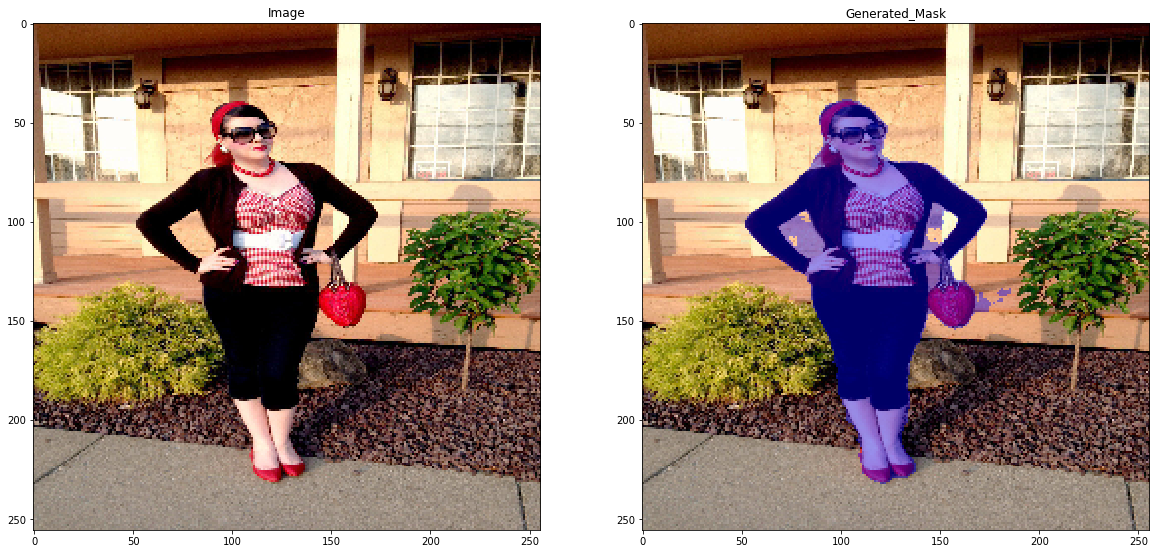

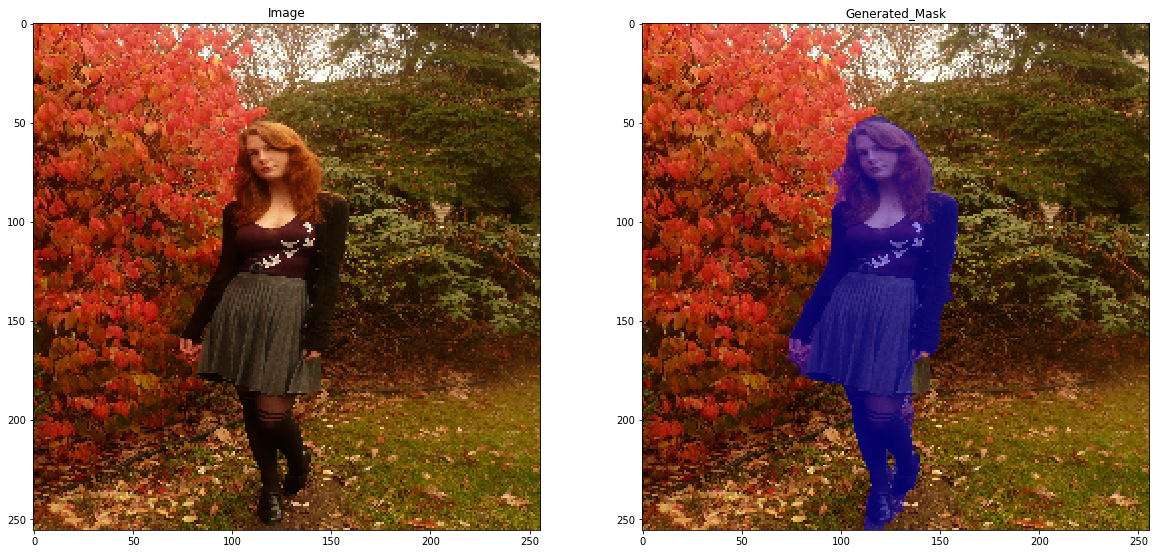

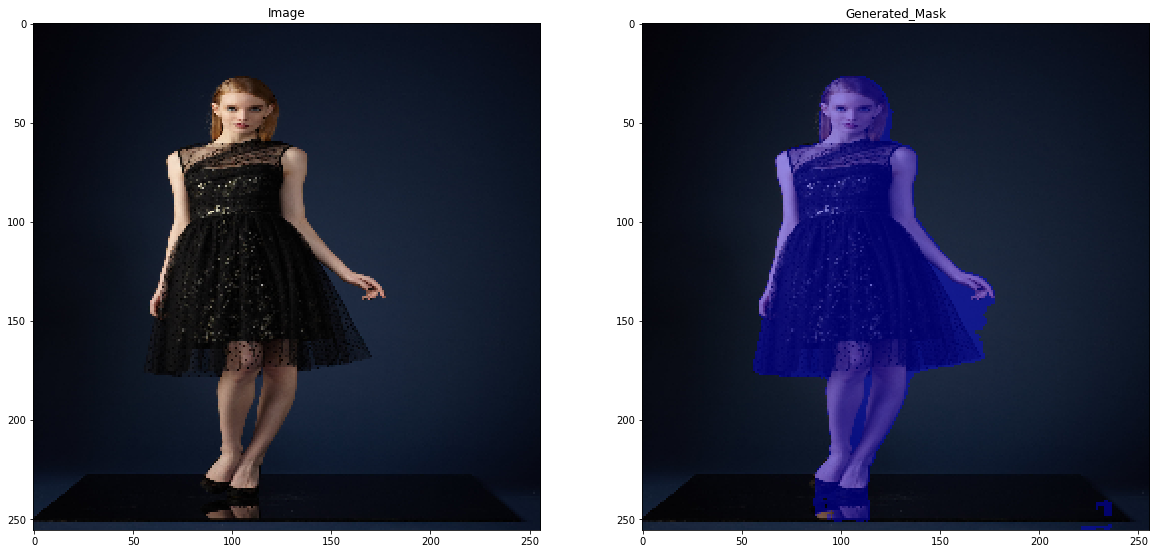

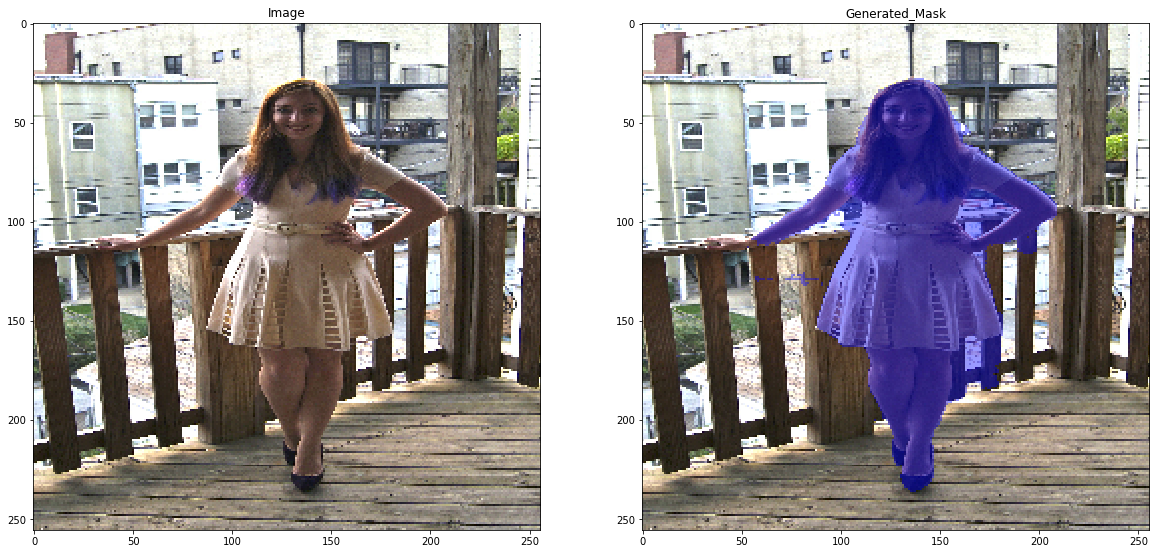

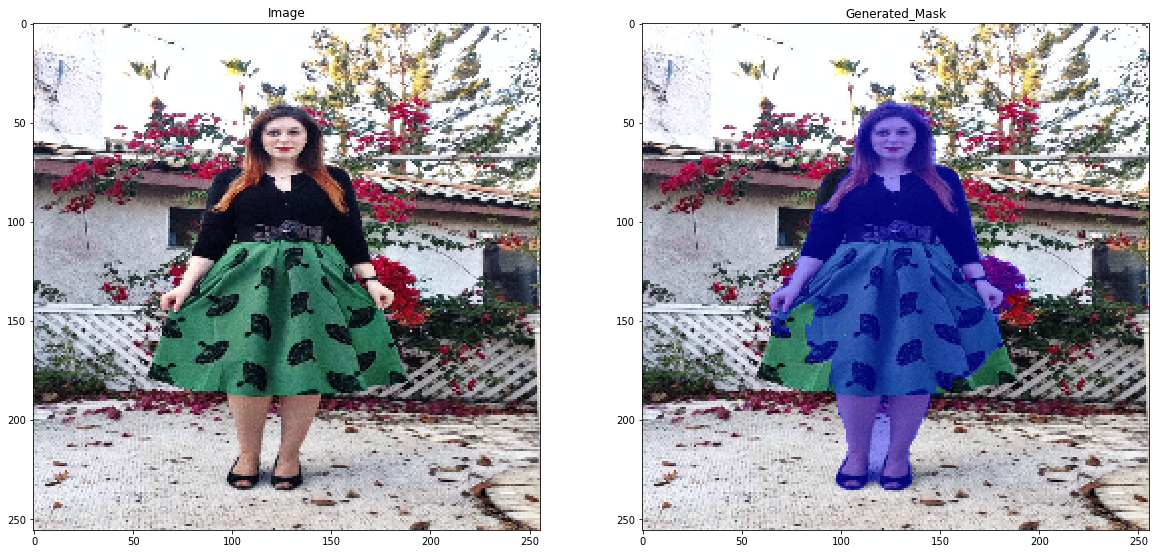

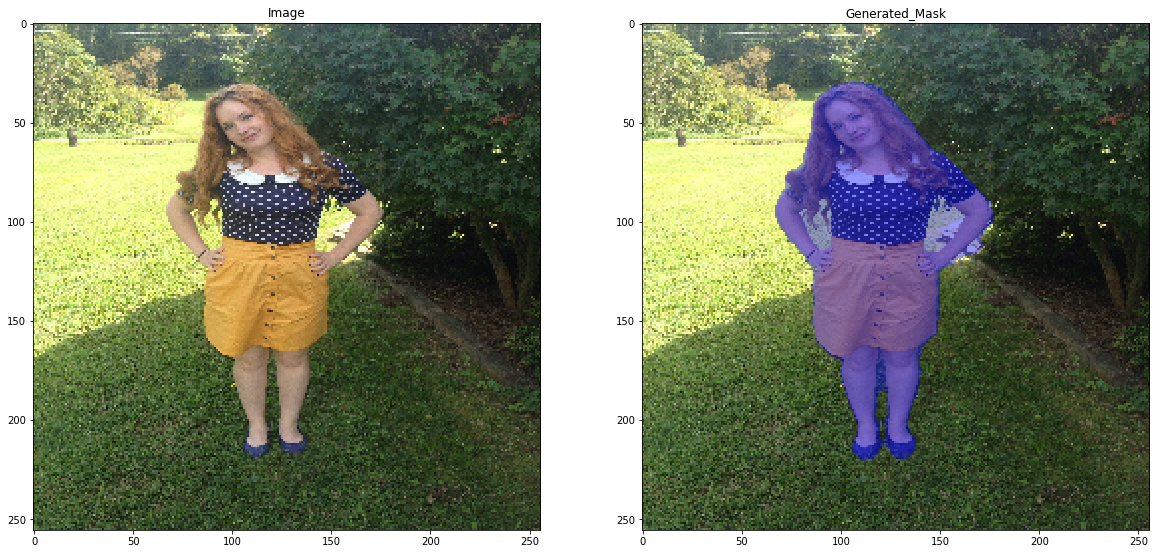

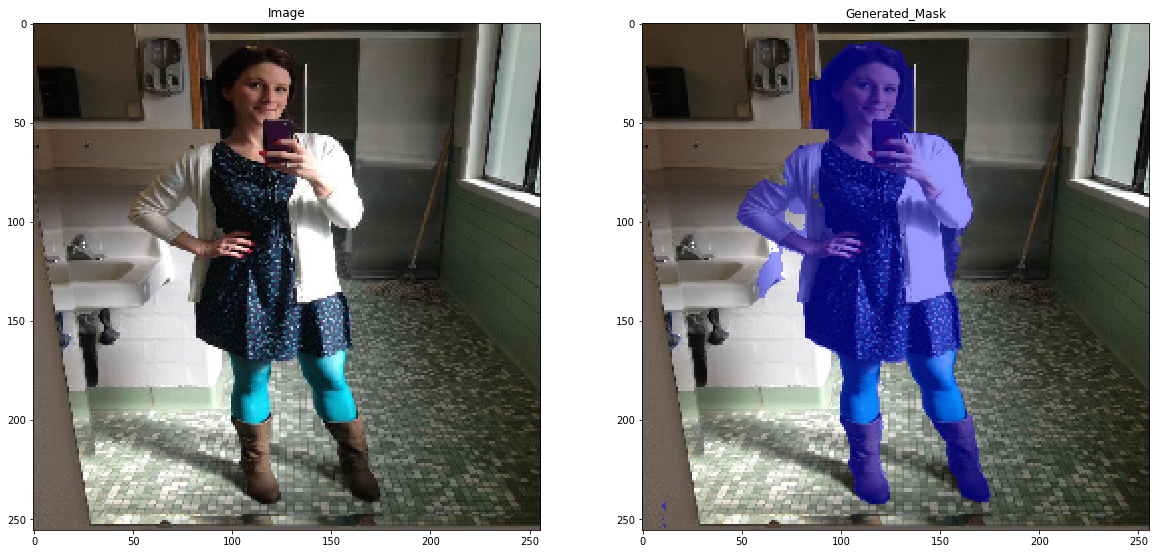

In [102]:
s = time.time()
alpha = 0.4
for i in idx:
    x = image.load_img(f'test/{image_list[i]}', target_size=(256, 256))
    x = image.img_to_array(x)/255.
    
    z = unet.predict(np.expand_dims(x, axis=0))
    z = np.squeeze(z)
    
    z[z < 0.5] = 0.0
    z[z >= 0.5] = 1.0
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'Image')
    ax.imshow(x)
    
    result = x.copy()
    x[z==1]=[0, 0, 1]
    result = cv2.addWeighted(x, alpha, result, 1-alpha, 0, result)
    ax3 = fig.add_subplot(1,2,2)
    ax3.set_title(f'Generated_Mask')
    ax3.imshow(result)
    fig.savefig(f'outputs/output_{i}.png')
ii
e = time.time()
t = str(e-s)
o = str((e-s)/len(image_list))
print(f'total time taken = {t}')
print(f'time taken per image = {o}')